In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

import sklearn
%matplotlib inline

In [2]:
#data = pd.read_csv("~/datacsv/Churn_Modelling.csv")
data = pd.read_csv("~/datacsv/Bengaluru_House_Data.csv")
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
data.shape

(13320, 9)

In [5]:
data.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
#data.groupby("availability")["availability"].agg("count")

In [7]:
data.groupby("location")["location"].agg("count")

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [8]:
data3=data.drop(["availability","society","balcony"],axis="columns")
data3

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [9]:
data3.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
data3['bath']=data3['bath'].fillna(data3['bath'].mean())
data3.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [11]:
data4=data3.dropna()

In [12]:
data4.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
data4.shape

(13303, 6)

In [14]:
data4

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [15]:
data4['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [16]:
data4['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
data4['bhk'] = data4['size'].apply(lambda x: int(x.split(" ")[0]))
data4

<ipython-input-17-3ec60a8a5a64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['bhk'] = data4['size'].apply(lambda x: int(x.split(" ")[0]))


,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [18]:
data4['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [19]:
data4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def convert_sqft_to_no(x):
    try:
        if(len(x.split("-"))==2):
           return float((x[0]+x[1])/2)
        else:
            return float(x)
    
    except:
       return None

In [21]:
data5=data4.copy()
data5['total_sqft']=data5['total_sqft'].apply(convert_sqft_to_no)
data5

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Super built-up Area,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [22]:
data5['price_per_sqft']=(data5['price']*1000)/data5['total_sqft']

In [23]:
data5

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36.998106
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46.153846
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43.055556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62.458909
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,42.500000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,66.898349
13316,Super built-up Area,Richards Town,4 BHK,3600.0,5.0,400.00,4,111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,52.585451
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,104.073363


In [24]:
data5["location"]=data5.location.apply(lambda x: x.strip())

In [25]:
location_stats=data5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [26]:
len(location_stats[location_stats<=5])

908

In [27]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [28]:
data5['location']=data5.location.apply(lambda x:'other'if x in location_stats_less_than_10 else x)
len(data5['location'].unique())

242

In [29]:
data5

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36.998106
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46.153846
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43.055556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62.458909
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,42.500000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,66.898349
13316,Super built-up Area,other,4 BHK,3600.0,5.0,400.00,4,111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,52.585451
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,104.073363


In [30]:
data5[data5["total_sqft"]/data5["bhk"]<300]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,362.745098
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,106.609808
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,62.962963
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,200.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,other,7 Bedroom,1400.0,7.0,218.0,7,155.714286
13279,Plot Area,other,6 Bedroom,1200.0,5.0,130.0,6,108.333333
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,90.909091
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,90.439276


In [31]:
data6 = data5[~(data5["total_sqft"]/data5["bhk"]<300)]
data6.shape

(12559, 8)

In [32]:
data6['price_per_sqft'].describe()

count    12320.000000
mean        63.234325
std         41.861474
min          2.678298
25%         42.093448
50%         53.000000
75%         69.385565
max       1764.705882
Name: price_per_sqft, dtype: float64

In [33]:
def remove_pps_outliers(df):
    res_df=pd.DataFrame()
    for i,sub_df in df.groupby('location'):
        m=np.mean(sub_df.price_per_sqft)
        sd=np.std(sub_df.price_per_sqft)
        reduced_df=sub_df[(sub_df.price_per_sqft>(m-sd)) & (sub_df.price_per_sqft<=(m+sd))]
        res_df=pd.concat([res_df,reduced_df],ignore_index=True)
    return res_df

data7=remove_pps_outliers(data6)
data7

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,150.175439
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,119.018405
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,125.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,108.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,119.838057
...,...,...,...,...,...,...,...,...
10140,Super built-up Area,other,2 BHK,1353.0,2.0,110.00,2,81.300813
10141,Plot Area,other,1 Bedroom,812.0,1.0,26.00,1,32.019704
10142,Super built-up Area,other,3 BHK,1440.0,2.0,63.93,3,44.395833
10143,Super built-up Area,other,2 BHK,1075.0,2.0,48.00,2,44.651163


In [34]:
def plot_scatter_chart(df,location):
    bhk_2=df[(df.location==location) & (df.bhk==2)]
    bhk_3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk_2.total_sqft,bhk_2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk_3.total_sqft,bhk_3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total sqft Area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()
    

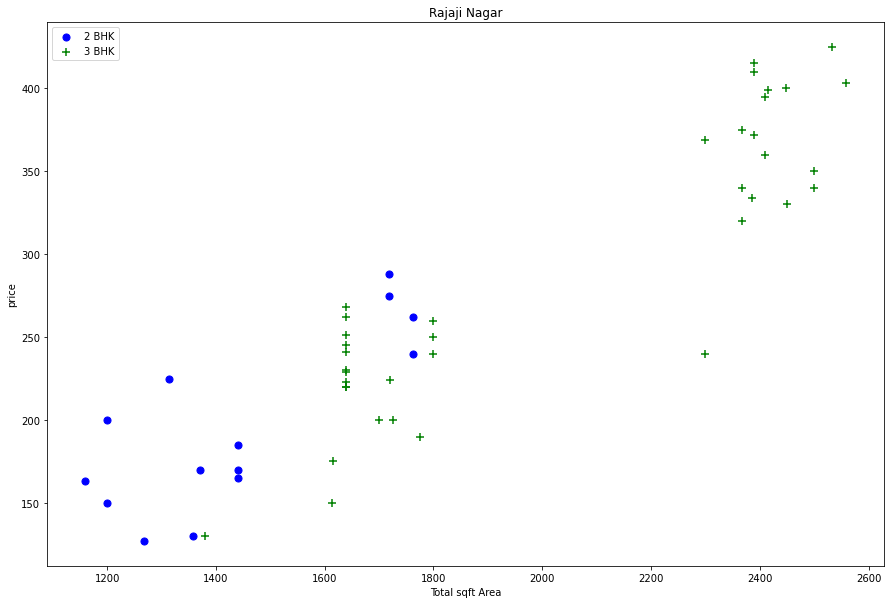

In [35]:
plot_scatter_chart(data7,"Rajaji Nagar")

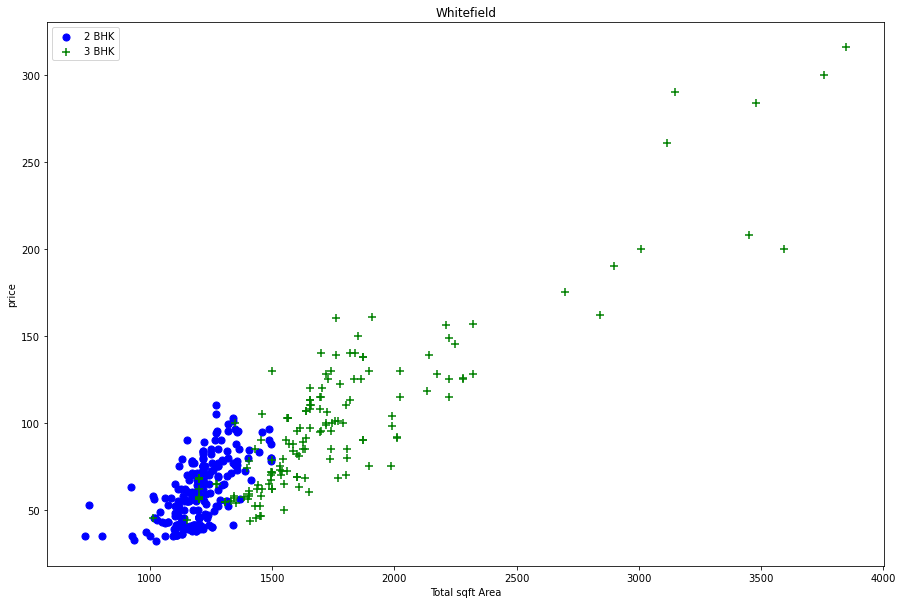

In [36]:
plot_scatter_chart(data7,"Whitefield")

In [37]:
#we can remove Greater BHK appartments whose price per square foot is less than that of Lesser BHK appartments:


def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data8=remove_bhk_outliers(data7)
data8.shape

(7222, 8)

In [38]:
data8

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,150.175439
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,119.018405
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,125.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,108.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,119.838057
...,...,...,...,...,...,...,...,...
10136,Carpet Area,other,2 BHK,1200.0,2.0,70.0,2,58.333333
10137,Super built-up Area,other,1 BHK,1800.0,1.0,200.0,1,111.111111
10140,Super built-up Area,other,2 BHK,1353.0,2.0,110.0,2,81.300813
10141,Plot Area,other,1 Bedroom,812.0,1.0,26.0,1,32.019704


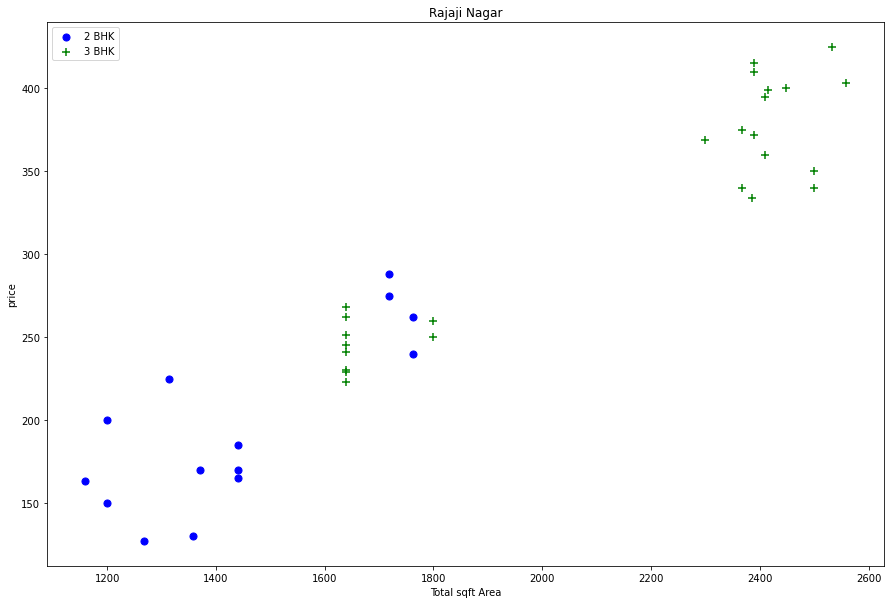

In [39]:
plot_scatter_chart(data8,'Rajaji Nagar')

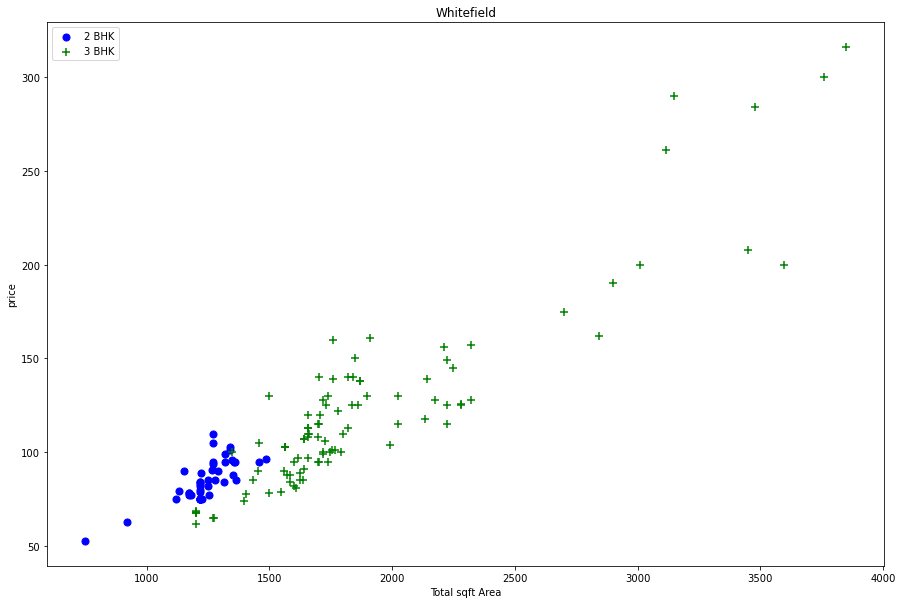

In [40]:
plot_scatter_chart(data8,'Whitefield')

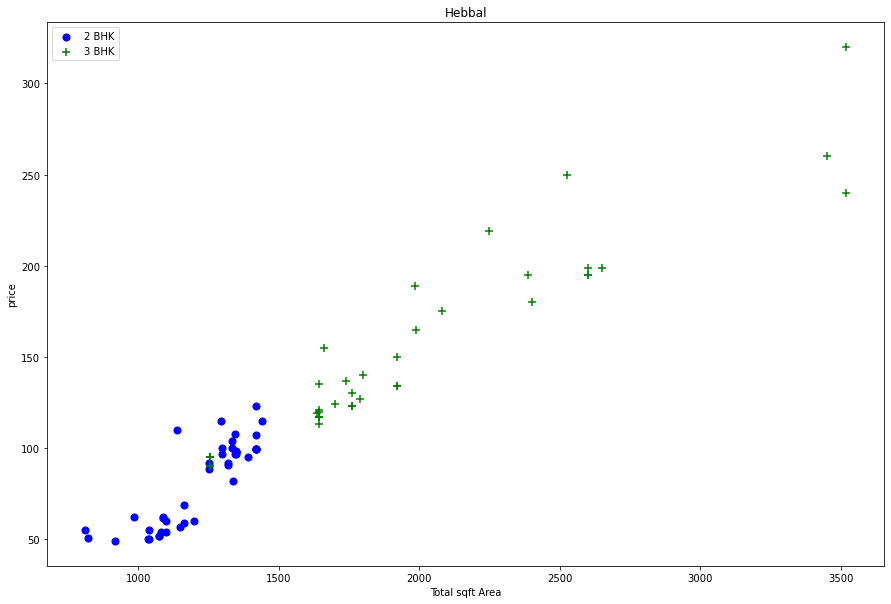

In [41]:
plot_scatter_chart(data8,'Hebbal')

Text(0, 0.5, 'Count')

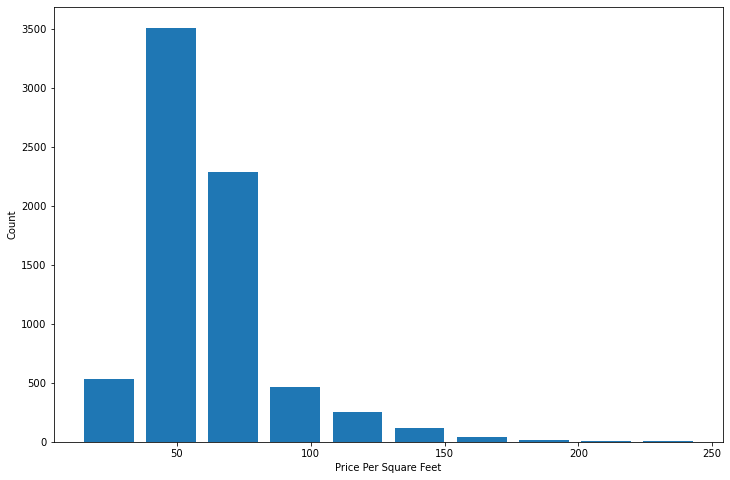

In [42]:
matplotlib.rcParams["figure.figsize"] = (12,8)
plt.hist(data8.price_per_sqft,rwidth=.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [43]:
data8.bath.unique()

array([ 4.        ,  3.        ,  2.        ,  5.        ,  8.        ,
        1.        ,  6.        ,  7.        ,  9.        ,  2.69260965,
       12.        , 16.        , 13.        ])

In [44]:
data8[data8.bath>10]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
5224,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,40.000000
8392,Super built-up Area,other,10 BHK,12000.0,12.0,525.0,10,43.750000
8481,Super built-up Area,other,16 BHK,10000.0,16.0,550.0,16,55.000000
9214,Super built-up Area,other,11 BHK,6000.0,12.0,150.0,11,25.000000
9543,Super built-up Area,other,13 BHK,5425.0,13.0,275.0,13,50.691244


Text(0, 0.5, 'Count')

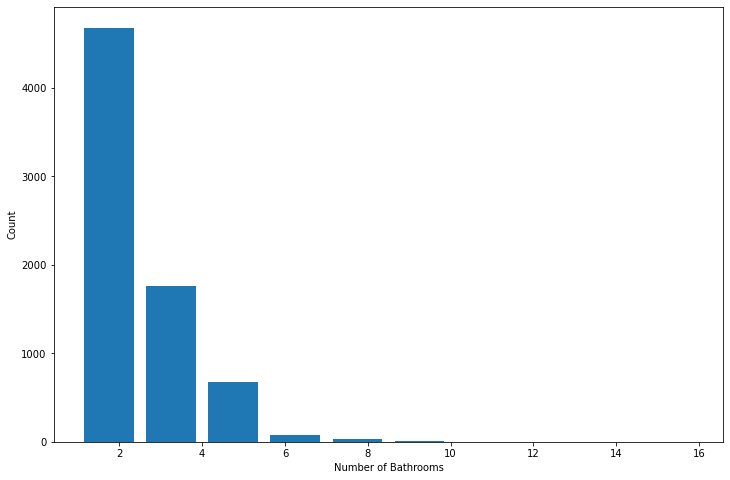

In [45]:
plt.hist(data8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [46]:
data8[data8.bath>data8.bhk+2]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
1611,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,32.520325
5185,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,64.285714
6643,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,64.230343
8317,Super built-up Area,other,6 BHK,11338.0,9.0,1000.0,6,88.198977


In [47]:
data9=data8[data8.bath<data8.bhk+2]
data9.shape

(7149, 8)

In [48]:
data10=data9.drop(['size','price_per_sqft'],axis='columns')

data10

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...,...
10136,Carpet Area,other,1200.0,2.0,70.0,2
10137,Super built-up Area,other,1800.0,1.0,200.0,1
10140,Super built-up Area,other,1353.0,2.0,110.0,2
10141,Plot Area,other,812.0,1.0,26.0,1


In [49]:
dummies=pd.get_dummies(data10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
data12=pd.concat([data10,dummies.drop('other',axis='columns')],axis='columns')
data12

,area_type,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10136,Carpet Area,other,1200.0,2.0,70.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10137,Super built-up Area,other,1800.0,1.0,200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10140,Super built-up Area,other,1353.0,2.0,110.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10141,Plot Area,other,812.0,1.0,26.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data13=data12.drop(['area_type','location'],axis='columns')

data13

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10136,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10137,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10140,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10141,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
x=data13.drop('price',axis='columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y=data13['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [54]:
#x = data2.iloc[:,0:7].values
#y=data2.iloc[:,7].values

In [55]:
x

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10136,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10137,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10140,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10141,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
x.shape

(7149, 244)

In [57]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10136     70.0
10137    200.0
10140    110.0
10141     26.0
10144    400.0
Name: price, Length: 7149, dtype: float64

In [58]:
y.shape

(7149,)

In [59]:
# splitting the training & test sets:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2)

In [60]:
x_train.shape ,x_test.shape, y_train.shape ,y_test.shape

((5719, 244), (1430, 244), (5719,), (1430,))

In [61]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
x_train = mc.fit_transform(x_train)
x_test = mc.fit_transform( x_test)

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [63]:
# Initialize the model
model=Sequential()

# Build input layer & Hidden layer
model.add(Dense(units=488, activation='relu', input_dim=244))
model.add(Dropout(rate=0.1))


In [64]:
# Building second layer
model.add(Dense(units=244,activation ='relu'))
model.add(Dropout(rate=0.2))

In [65]:
# Building third layer
#model.add(Dense(units=244,activation ='relu'))
#model.add(Dropout(rate=0.3))

In [66]:
#Adding outer layer
model.add(Dense(units = 1, activation='linear'))

In [67]:
# compile the model
#model.compile(optimizer='adam', loss='mae')

In [68]:
model.compile(optimizer='adam', loss='mae')

#Fit model:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_minitor = EarlyStopping(patience=300)

#train model:
history = model.fit(x_train, y_train,
 epochs=300,
 batch_size=32,
 validation_split=0.2,
 callbacks=[early_stopping_minitor])


Epoch 1/300
143/143 [==============================] - 1s 2ms/step - loss: 56.4782 - val_loss: 36.5495
Epoch 2/300
143/143 [==============================] - 0s 2ms/step - loss: 29.9849 - val_loss: 27.3643
Epoch 3/300
143/143 [==============================] - 0s 2ms/step - loss: 25.1003 - val_loss: 24.4982
Epoch 4/300
143/143 [==============================] - 0s 2ms/step - loss: 23.2405 - val_loss: 22.9987
Epoch 5/300
143/143 [==============================] - 0s 2ms/step - loss: 22.2621 - val_loss: 22.5397
Epoch 6/300
143/143 [==============================] - 0s 2ms/step - loss: 21.2793 - val_loss: 21.6314
Epoch 7/300
143/143 [==============================] - 0s 2ms/step - loss: 20.7108 - val_loss: 21.0683
Epoch 8/300
143/143 [==============================] - 0s 2ms/step - loss: 19.9346 - val_loss: 20.1513
Epoch 9/300
143/143 [==============================] - 0s 2ms/step - loss: 19.2132 - val_loss: 19.2900
Epoch 10/300
143/143 [==============================] - 0s 2ms/step - los

dict_keys(['loss', 'val_loss'])


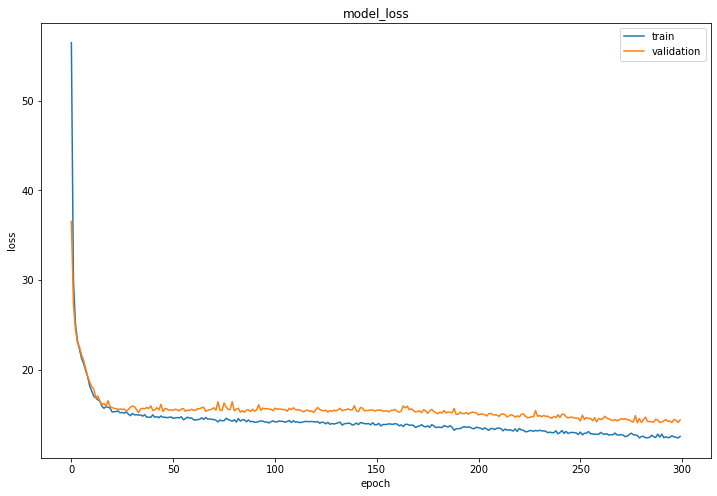

In [69]:
# Plot loss of train and test set
print(history.history.keys())

#Loss in train and test:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [70]:
#evaluate the result
print('Evaluation on test data')
results = model.evaluate(x_train, y_train)
print('mae: ', results)

Evaluation on test data
179/179 [==============================] - 0s 757us/step - loss: 11.9344
mae:  11.934432029724121


In [71]:
data13.price.describe()

count    7149.000000
mean       96.924050
std        87.941572
min        10.000000
25%        50.000000
50%        73.000000
75%       110.000000
max      2200.000000
Name: price, dtype: float64

In [74]:
#mae/mean ratio : 12%
11.93/96

0.12427083333333333